In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive/images_IOSTAR 
path_img ='gdrive/MyDrive/images_IOSTAR'

GT_01.png  GT_21.png  GT_37.png       star03_OSN.jpg  star28_ODN.jpg
GT_02.png  GT_26.png  GT_48.png       star08_OSN.jpg  star32_ODC.jpg
GT_03.png  GT_28.png  star01_OSC.jpg  star21_OSC.jpg  star37_ODN.jpg
GT_08.png  GT_32.png  star02_OSC.jpg  star26_ODC.jpg  star48_OSN.jpg


(512, 512)
Accuracy = 0.8444262964475296 , Recall = 0.8492813141683778


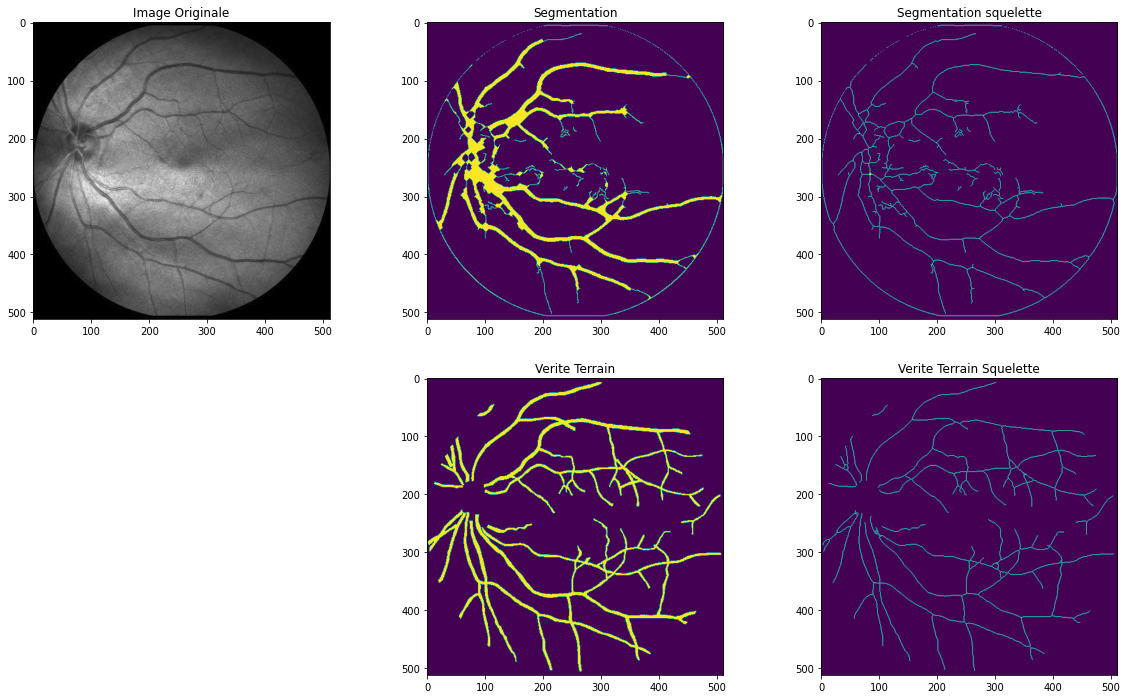

In [ ]:
import numpy as np
from skimage.morphology import thin, erosion, dilation, binary_erosion, opening, closing, white_tophat, reconstruction, black_tophat, skeletonize, convex_hull_image, local_maxima,local_minima,remove_small_holes
from skimage.morphology import square, diamond, octagon, rectangle, star, disk
from skimage.feature import canny
from skimage.filters.rank import entropy, enhance_contrast_percentile
from PIL import Image
from scipy import ndimage as ndi
from skimage.util import img_as_ubyte
import math
from skimage import data, filters
from matplotlib import pyplot as plt

boule=np.array([[-1],[0],[1]])
boule3=square(4)
boule2=square(8)

def my_segmentation(img, img_mask, seuil):
  # ici il faut ecrire votre code
  imgblur=filters.gaussian(img,sigma=0.85)
  imgedge=canny(imgblur)
  imglilblur=filters.gaussian(img,sigma=0.7)
  imgram=canny(imglilblur)
  imgedge=dilation(imgedge)
  imgedge=dilation(imgedge)
  imgedge=dilation(imgedge)
  imgedge=dilation(imgedge)
  imgedge=erosion(imgedge)
  imgedge=erosion(imgedge)
  imgedge=erosion(imgedge)
  imgedge=erosion(imgedge)
  imgedge=imgedge+imgram
  img_out = (img_mask & imgedge)
  return img_out


def evaluate(img_out, img_GT):
  # Code d'evaluation
  # assert img_out print(b.astype(np.bool))
  #GT_skel  = skeletonize(img_GT)
  #img_out_skel  = skeletonize(img_out)
  GT_skel  = thin(img_GT, max_iter = 15)  
  img_out_skel  = thin(img_out, max_iter = 15)
  TP = np.sum(img_GT & img_out) # Vrais positifs
  FP = np.sum(img_out_skel & ~img_GT) # Faux positifs (relaxes)
  FN = np.sum(GT_skel & ~img_out) # Faux negatifs (relaxes)

  ACCU = TP / (TP + FP) # Precision
  RECALL = TP / (TP + FN) # Rappel
  return ACCU, RECALL, img_out_skel, GT_skel

#Ouvrir l'image originale en niveau de gris
img =  np.asarray(Image.open(path_img+'/star01_OSC.jpg')).astype(np.uint8)
print(img.shape)

nrows, ncols = img.shape
row, col = np.ogrid[:nrows, :ncols]
#On ne considere que les pixels dans le disque inscrit 
img_mask = (np.ones(img.shape)).astype(np.bool_)
invalid_pixels = ((row - nrows/2)**2 + (col - ncols/2)**2 > (nrows / 2)**2)
img_mask[invalid_pixels] = 0

img_out = my_segmentation(img,img_mask,80)

#Ouvrir l'image Verite Terrain en booleen
img_GT =  np.asarray(Image.open(path_img+'/GT_01.png')).astype(np.bool_)

ACCU, RECALL, img_out_skel, GT_skel = evaluate(img_out, img_GT)
print('Accuracy =', ACCU,', Recall =', RECALL)

plt.figure(figsize = (20,12))
plt.subplot(231)
plt.imshow(img,cmap = 'gray')
plt.title('Image Originale')
plt.subplot(232)
plt.imshow(img_out)
plt.title('Segmentation')
plt.subplot(233)
plt.imshow(img_out_skel)
plt.title('Segmentation squelette')
plt.subplot(235)
plt.imshow(img_GT)
plt.title('Verite Terrain')
plt.subplot(236)
plt.imshow(GT_skel)
plt.title('Verite Terrain Squelette')
plt.show()

